## Solusi Analitik Persamaan Schrodinger Sistem Bermassa Kompleks Pada Potensial Kotak 
Solusi analitik dalam penyelesaian persamaan Schroedinger dengan sistem bermassa kompleks dimensi satu yang terdiri dari bagian riil $m_R=1$ (konstan) dan bagian imajjiner ($m_{I1}-$ dan $m_{I2}+$).
<br> Last update: 08-Nov-2021

In [1]:
#modul yang digunakan
from sympy import symbols, lambdify, exp, I, sqrt, conjugate
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import scipy.integrate

#Pengenalan variabel sebagai simbol menggunakan modul sympy
#variabel pada persamaan
k1, k2 = symbols('k1 k2')
m1, m2 = symbols('m1 m2')
v1, v2 = symbols('v1 v2')
L, En, h_bar, x = symbols('L En hbar x')

Membuat persamaan (3.37):
<br>$f(k_1,k_2)=k_1(1-e^{2ik_2L})(1+e^{-2ik_1L})-k_2(1-e^{-2ik_1L})(1+e^{2ik_2L})=0$.

In [2]:
f = k1*(1-exp(I*k2*2*L))*(1+exp(-I*k1*2*L))-(k2*(1-exp(-I*k1*2*L))*(1+exp(I*k2*2*L)))
f

k1*(1 + exp(-2*I*L*k1))*(1 - exp(2*I*L*k2)) - k2*(1 - exp(-2*I*L*k1))*(exp(2*I*L*k2) + 1)

Kemudian subtitusi $k=\sqrt{2m(E-V)}/\hbar$ dengan energi sehingga fungsi menjadi $f(E)=0$ (3.38). Subtitusi $V=0$.

In [3]:
fE = f.subs([(k1, sqrt(2*m1)/h_bar), (k2, sqrt(2*m2)/h_bar)])
fE.expand()

-sqrt(2)*sqrt(m1)*exp(2*sqrt(2)*I*L*sqrt(m2)/hbar)/hbar + sqrt(2)*sqrt(m1)/hbar - sqrt(2)*sqrt(m1)*exp(-2*sqrt(2)*I*L*sqrt(m1)/hbar)*exp(2*sqrt(2)*I*L*sqrt(m2)/hbar)/hbar + sqrt(2)*sqrt(m1)*exp(-2*sqrt(2)*I*L*sqrt(m1)/hbar)/hbar - sqrt(2)*sqrt(m2)*exp(2*sqrt(2)*I*L*sqrt(m2)/hbar)/hbar - sqrt(2)*sqrt(m2)/hbar + sqrt(2)*sqrt(m2)*exp(-2*sqrt(2)*I*L*sqrt(m1)/hbar)*exp(2*sqrt(2)*I*L*sqrt(m2)/hbar)/hbar + sqrt(2)*sqrt(m2)*exp(-2*sqrt(2)*I*L*sqrt(m1)/hbar)/hbar

### Menentukan Energi
Variabel perkalian massa dengan energi $En$: <br>$m_1=E_n-iE_nm_I$ dan $m_2=E_n+iE_nm_I$ 
<br>Subtitusi nilai semua variabel kecuali pada variabel $E_n$

In [4]:
#subtitusi v1=v2=0, panjang kotak [-5,5]
pot1 = 0
pot2 = 0
hbar = 1
length = 5

#definisikan massaxEnergi
mi = 0.1
mass1En = En - I*En*mi
mass2En = conjugate(mass1En)

fE_val = fE.subs([(v1, pot1), (v2, pot2), (m1, mass1En), (m2, mass2En), (h_bar, hbar), (L, length)])
fE_val

-sqrt(2)*(1 - exp(-10*sqrt(2)*I*sqrt(En - 0.1*I*En)))*(exp(10*sqrt(2)*I*sqrt(conjugate(En) + 0.1*I*conjugate(En))) + 1)*sqrt(conjugate(En) + 0.1*I*conjugate(En)) + sqrt(2)*(1 + exp(-10*sqrt(2)*I*sqrt(En - 0.1*I*En)))*(1 - exp(10*sqrt(2)*I*sqrt(conjugate(En) + 0.1*I*conjugate(En))))*sqrt(En - 0.1*I*En)

Ubah variabel sympy ke numpy menggunakan fungsi lambdify sehingga persamaan bisa diselesaikan:

In [5]:
gE = lambdify(En, fE_val)

Energi ditentukan dengan cara mencari titik yang menghasilkan $g(E) = 0$ menggunakan bantuan grafik.

In [6]:
N = 100

#cari dimana titik energi sistem pada sekitaran En = 0 sampai En = 2 dengan 50 digit
n_energy = 0.9
energy = np.linspace(0, n_energy, (N//2))

#cari energi bagian imajiner dan realnya
gE_imag = np.imag(gE(energy))
gE_real = np.real(gE(energy))

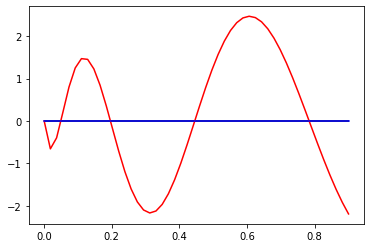

In [7]:
#buatkan grafik untuk gE bagian imajiner
plt.plot(energy, gE_imag, '-r')
plt.plot(energy, gE_real, '-b')
plt.hlines(0, 0, n_energy)
plt.show()

Menentukan nilai energi $E_n$ sebenarnya dengan metode Newton-Raphson yang dimana metode ini sudah ada pada python yaitu fungsi "root finding" pada modul scipy.

In [8]:
#keadaan sistem n = 0,1,2,...
n = 0

#fungsi "root finding" dengan metode Newton-Raphson
E = optimize.newton(gE, 0.05)
E

(0.0494721036906509+4.0680317007382895e-19j)

### Menentukan Fungsi Gelombang
Selanjutnya menentukan koefisien $A_2$ untuk mendapatkan fungsi gelombang yang ternormalisasi.

In [9]:
#definisi nilai variabel-variabel dengan memasukkan nilai energi
L = length
En = E.real

mass_i = complex(0, mi)
m1En = En - En*mass_i
m2En = En + En*mass_i

k1 = np.sqrt(2*m1En)/hbar
k2 = np.sqrt(2*m2En)/hbar

In [10]:
#fungsi gelombang belum dinormalisasi
#koef A1 untuk mi=0
#EVEN, n=0,2,4,6
#A1 = -(k2*(1+exp(I*k2*2*L)))/(k1*(1+exp(-I*k1*2*L)))
#ODD, n=1,3,5
#A1 = (k2*(1+exp(I*k2*2*L)))/(k1*(1+exp(-I*k1*2*L)))

#koef A1 untuk mi != 0
A1 = (1 - exp(I*k2*2*L))/(1 - exp(-I*k1*2*L))

psi1 = A1*(exp(I*k1*x) - exp(-I*k1*(x+(2*L))))
psi2 = exp(I*k2*x) - exp(-I*k2*(x-(2*L)))

psi1

(1 - exp(10*I*(0.314945951825507 + 0.0157081249668072*I)))*(exp(I*x*(0.314945951825507 - 0.0157081249668072*I)) - exp(-I*(0.314945951825507 - 0.0157081249668072*I)*(x + 10)))/(1 - exp(-10*I*(0.314945951825507 - 0.0157081249668072*I)))

In [11]:
#ubah fungsi gelombang dari sympy ke numpy
psi1x = lambdify(x, psi1)
psi2x = lambdify(x, psi2)


#definisi sumbu-x, jarak antar titik data dx=0,1
x1 = np.arange(-5,0,0.1) #50 data
x2 = np.arange(0,5.1, 0.1) #51 data

#nilai psi1(x) dan psi2(x) belum ternormalisasi
psi1x1 = psi1x(x1)
psi2x2 = psi2x(x2)

Normalisasi menggunakan persamaan(3.6)

In [12]:
#Normalisasi: menentukan koefisien A2
prob1 = np.sum(np.conjugate(psi1x1)*psi1x1)
prob2 = np.sum(np.conjugate(psi2x2)*psi2x2)

dx = 2*L/N
norm = float(np.sqrt((prob1+prob2)*dx).real)
norm

4.147983355151259

In [13]:
#fungsi gelombang ternormalisasi dan konjugatnya
psi1_norm = psi1/norm
psi2_norm = psi2/norm

# ubah sympy ke numpy: fungsi gelombang ternormalisasi bergantung x
psi1x_norm = lambdify(x, psi1_norm)
psi2x_norm = lambdify(x, psi2_norm)

psi1x_norm_conj =lambdify(x, conjugate(psi1_norm))
psi2x_norm_conj = lambdify(x, conjugate(psi2_norm))

### Menghitung Arus Densitas Probabilitas $j(x)$
$j(x)=\Large\frac{\hbar}{2im}(\small\psi^{*}(x)\Large\frac{d\psi(x)}{dx}\small-\psi(x)\Large\frac{d\psi^{*}(x)}{dx})$
<br><br>Selesaikan bagian turunannya terlebih dahulu:

In [14]:
#ambil langkah selebar h
h = dx
#turunan psi dan konjugatnya
dpsi1 = (psi1x_norm(x1+h) - psi1x_norm(x1-h))/(2*h)
dpsi2 = (psi2x_norm(x2+h) - psi2x_norm(x2-h))/(2*h)

dpsi1_conj1 = (psi1x_norm_conj(x1+h) - psi1x_norm_conj(x1-h))/(2*h)
dpsi2_conj2 = (psi2x_norm_conj(x2+h) - psi2x_norm_conj(x2-h))/(2*h)

Lalu kumpulkan semua komponen untuk menghitung arus

In [15]:
#persamaan arus densitas j(x)
m1 = m1En/En
m2 = m2En/En
j1 = (-0.5j/m1)*(psi1x_norm_conj(x1)*dpsi1 - psi1x_norm(x1)*dpsi1_conj1)
j2 = (-0.5j/m2)*(psi2x_norm_conj(x2)*dpsi2 - psi2x_norm(x2)*dpsi2_conj2)
len(j2)

51

### Menampilkan Grafik

In [16]:
#gabungkan variabel sumbu x, fungsi gelombang, dan arus
x = np.concatenate((x1, x2))
psi = np.concatenate((psi1x_norm(x1), psi2x_norm(x2)))
j = np.concatenate((j1, j2))
len(j)

101

Menampilkan grafik fungsi gelombang dan arus densitas probabilitas

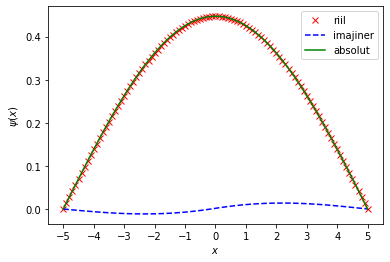

In [17]:
#buat grafik fungsi gelombang
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')

plt.plot(x, psi.real, 'xr')
plt.plot(x, psi.imag, '--b')
plt.plot(x, np.absolute(psi), 'g')
plt.xticks(np.arange(-5, 6))

plt.legend(["riil", "imajiner", "absolut"], loc= "upper right", prop={'size':10})
plt.savefig('E:\\scriptpsi\\grafik\\fungsigelombang\\psi_ana_m'+ str(mi) +'n' + str(n)+'.png', dpi=500,  bbox_inches="tight")
plt.show()

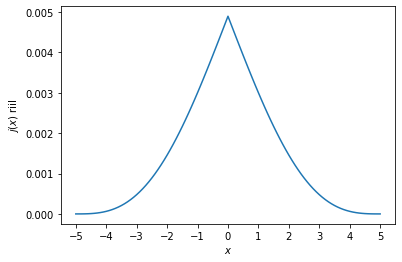

In [18]:
#buatkan grafik arus densitas bagian riil
plt.xlabel('$x$')
plt.ylabel ('$j(x)$ riil')

plt.plot(x, j.real)
plt.xticks(np.arange(-5, 6))

plt.savefig('E:\\scriptpsi\\grafik\\arus\\j_ana_m'+ str(mi) +'n' + str(n)+'.png', dpi=500,  bbox_inches="tight")
plt.show()

### Simpan data dalam file .csv
Menyimpan data fungsi gelombang dan densitas probabilitas arus ke local disk E

In [19]:
#simpan array sebagai file csv
from numpy import asarray
from numpy import savetxt

#simpan fungsi gelombang
savetxt('E:\scriptpsi\data\psi_ana_realm'+str(mi)+'n'+str(n)+'.csv', psi.real, delimiter=',')
savetxt('E:\scriptpsi\data\psi_ana_imagm'+str(mi)+'n'+str(n)+'.csv', psi.imag, delimiter=',')
savetxt('E:\scriptpsi\data\psi_ana_absm'+str(mi)+'n'+str(n)+'.csv', np.absolute(psi), delimiter=',')

#simpan arus densitas
savetxt('E:\scriptpsi\data\j_ana_realm'+str(mi)+'n'+str(n)+'.csv', j.real, delimiter=',')